In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score

In [11]:
ruta = 'vivienda_Estadistica.csv'
df = pd.read_csv(ruta)

print(df.head())

     piso      piso.1  piso.2  estrato  preciom  areaconst  parquea  banios  \
0  8312.0  Zona Oeste     4.0      6.0   1300.0      318.0      2.0     4.0   
1  8311.0  Zona Oeste     1.0      6.0    480.0      300.0      1.0     4.0   
2  8307.0  Zona Oeste     NaN      5.0   1200.0      800.0      4.0     7.0   
3  8296.0    Zona Sur     2.0      3.0    220.0      150.0      1.0     2.0   
4  8297.0  Zona Oeste     NaN      5.0    330.0      112.0      2.0     4.0   

   habitac         tipo            barrio longitud  latitud  Id Comentarios  
0      2.0  Apartamento          arboleda   -76576   3454.0            33.0  
1      4.0         Casa         normandía   -76571   3454.0             1.0  
2      5.0         Casa        miraflores   -76568   3455.0            25.0  
3      4.0         Casa         el guabal   -76565   3417.0            29.0  
4      3.0         Casa  bella suiza alta   -76565   3408.0            23.0  


In [12]:
df.rename(columns={
    'piso': 'id_propiedad',   # Parece un identificador único
    'piso.1': 'zona',         # Indica la zona geográfica
    'piso.2': 'piso',         # Indica el número de piso
    'estrato': 'estrato',     # Nivel socioeconómico
    'preciom': 'precio_millones',  # Precio en millones
    'areaconst': 'area_construida',  # Área construida en m²
    'parquea': 'parqueaderos',  # Número de parqueaderos
    'banios': 'banios',        # Número de baños
    'habitac': 'habitaciones', # Número de habitaciones
    'tipo': 'tipo_vivienda',   # Tipo de vivienda (casa, apartamento, etc.)
    'barrio': 'barrio',        # Nombre del barrio
    'longitud': 'longitud',    # Coordenada geográfica
    'latitud': 'latitud',      # Coordenada geográfica
    'Id Comentarios': 'id_comentarios'  # ID de comentarios relacionados
}, inplace=True)

# Verificamos el cambio
print(df.head(10))


   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0        8312.0  Zona Oeste   4.0      6.0           1300.0            318.0   
1        8311.0  Zona Oeste   1.0      6.0            480.0            300.0   
2        8307.0  Zona Oeste   NaN      5.0           1200.0            800.0   
3        8296.0    Zona Sur   2.0      3.0            220.0            150.0   
4        8297.0  Zona Oeste   NaN      5.0            330.0            112.0   
5        8298.0    Zona Sur   NaN      5.0           1350.0            390.0   
6        8299.0    Zona Sur   2.0      6.0            305.0            125.0   
7        8300.0  Zona Oeste   NaN      5.0            480.0            280.0   
8        8286.0    Zona Sur   NaN      5.0            275.0             74.0   
9        8287.0    Zona Sur   2.0      5.0            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0           2.0     4.0           2.0   Aparta

In [13]:
# Convertir columnas a enteros sin afectar valores faltantes
cols_int = ["id_propiedad", "piso", "estrato", "parqueaderos", "banios", "habitaciones", "id_comentarios"]
for col in cols_int:
    df[col] = df[col].astype("Int64")  # Usa Int64 para permitir NaN


# Convertir 'longitud' a float, limpiando valores extraños
df["longitud"] = (
    df["longitud"]
    .astype(str)
    .str.replace(r"\.", "", regex=True)  # Elimina puntos separadores de miles
    .str.replace(",", ".")  # Convierte comas decimales a puntos
    .astype(float)
)

# Reemplazar valores incorrectos
df["tipo_vivienda"] = df["tipo_vivienda"].replace({"apto": "apartamento"})

# Convertir nombres de zonas, barrios y tipo de vivienda a minúsculas y eliminar espacios extra
cols_text = ["zona", "tipo_vivienda", "barrio"]
for col in cols_text:
    df[col] = df[col].str.lower().str.strip()


# Verificar los tipos de datos después de la conversión
print(df.dtypes)

id_propiedad         Int64
zona                object
piso                 Int64
estrato              Int64
precio_millones    float64
area_construida    float64
parqueaderos         Int64
banios               Int64
habitaciones         Int64
tipo_vivienda       object
barrio              object
longitud           float64
latitud            float64
id_comentarios       Int64
dtype: object


In [14]:
print(df.head(10))

   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0          8312  zona oeste     4        6           1300.0            318.0   
1          8311  zona oeste     1        6            480.0            300.0   
2          8307  zona oeste  <NA>        5           1200.0            800.0   
3          8296    zona sur     2        3            220.0            150.0   
4          8297  zona oeste  <NA>        5            330.0            112.0   
5          8298    zona sur  <NA>        5           1350.0            390.0   
6          8299    zona sur     2        6            305.0            125.0   
7          8300  zona oeste  <NA>        5            480.0            280.0   
8          8286    zona sur  <NA>        5            275.0             74.0   
9          8287    zona sur     2        5            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0             2       4             2   aparta

In [15]:
# Eliminar filas con pocos nulos
df.dropna(subset=['id_propiedad', 'zona', 'estrato', 'precio_millones', 'area_construida',
                  'banios', 'habitaciones', 'tipo_vivienda', 'barrio', 'longitud', 'latitud', 'id_comentarios'], inplace=True)

print(df.isnull().sum())


id_propiedad          0
zona                  0
piso               2635
estrato               0
precio_millones       0
area_construida       0
parqueaderos       1602
banios                0
habitaciones          0
tipo_vivienda         0
barrio                0
longitud              0
latitud               0
id_comentarios        0
dtype: int64


In [16]:
print(df.head(10))


   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0          8312  zona oeste     4        6           1300.0            318.0   
1          8311  zona oeste     1        6            480.0            300.0   
2          8307  zona oeste  <NA>        5           1200.0            800.0   
3          8296    zona sur     2        3            220.0            150.0   
4          8297  zona oeste  <NA>        5            330.0            112.0   
5          8298    zona sur  <NA>        5           1350.0            390.0   
6          8299    zona sur     2        6            305.0            125.0   
7          8300  zona oeste  <NA>        5            480.0            280.0   
8          8286    zona sur  <NA>        5            275.0             74.0   
9          8287    zona sur     2        5            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0             2       4             2   aparta

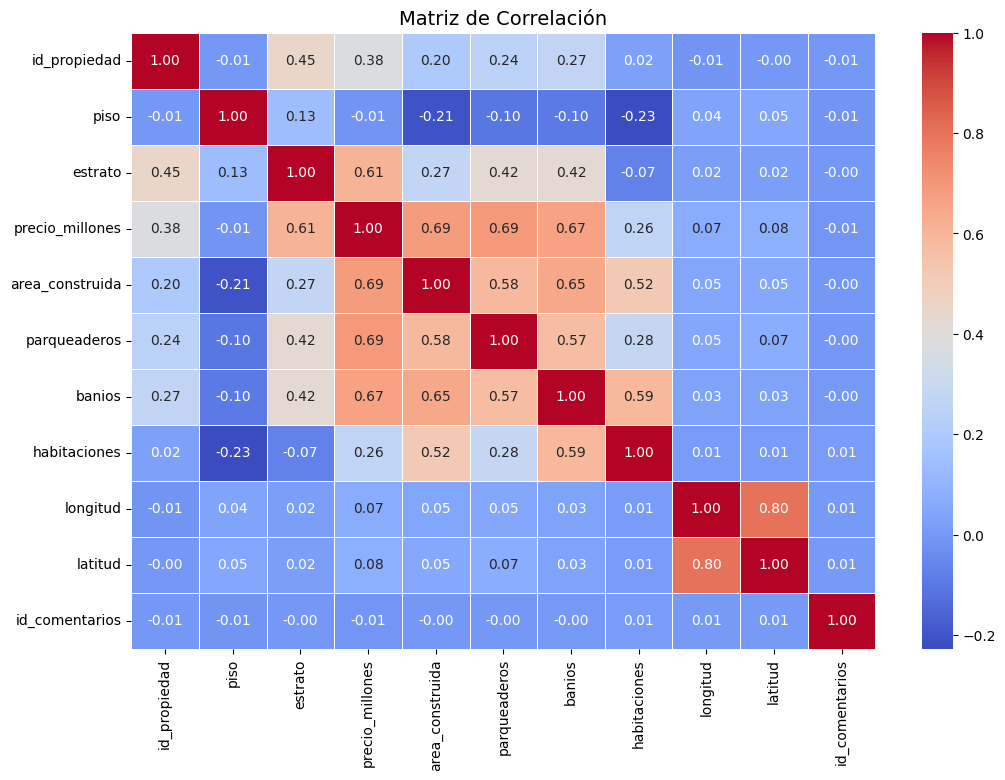

In [17]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["number"])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear un heatmap con seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título del gráfico
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar el gráfico
plt.show()


In [18]:
# Copia del DataFrame original
df_cleaned = df.copy()

# Aplicar LabelEncoder a todas las columnas categóricas ANTES de dividir los datos
label_encoders = {}
for col in df_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))
    label_encoders[col] = le

# Función mejorada para predecir valores faltantes usando solo las variables correlacionadas
def predict_missing_values(df, target_column, relevant_features):
    df_train = df[df[target_column].notna()]
    df_missing = df[df[target_column].isna()]

    if df_missing.empty:  # Si no hay valores nulos, no hacer nada
        return

    # Seleccionar solo las columnas relevantes
    X = df_train[relevant_features]
    y = df_train[target_column]

    # Entrenar modelo de regresión
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)

    # Predecir valores faltantes y convertirlos a enteros
    df.loc[df[target_column].isna(), target_column] = model.predict(df_missing[relevant_features]).round().astype(int)

# Aplicar la función con las variables más correlacionadas
predict_missing_values(df_cleaned, 'piso', ['estrato'])  # Solo estrato tiene algo de correlación (0.13)
predict_missing_values(df_cleaned, 'parqueaderos', ['precio_millones', 'estrato', 'area_construida'])

# Verificar que ya no haya valores nulos
print(df_cleaned.isnull().sum())


id_propiedad       0
zona               0
piso               0
estrato            0
precio_millones    0
area_construida    0
parqueaderos       0
banios             0
habitaciones       0
tipo_vivienda      0
barrio             0
longitud           0
latitud            0
id_comentarios     0
dtype: int64


In [19]:
columnas_a_restaurar = ['zona', 'barrio', 'tipo_vivienda']  # Agrega otras si fueron afectadas
for col in columnas_a_restaurar:
    df_cleaned[col] = df[col]


In [20]:
print(df_cleaned.head(10))

   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0          8312  zona oeste     4        6           1300.0            318.0   
1          8311  zona oeste     1        6            480.0            300.0   
2          8307  zona oeste     4        5           1200.0            800.0   
3          8296    zona sur     2        3            220.0            150.0   
4          8297  zona oeste     4        5            330.0            112.0   
5          8298    zona sur     4        5           1350.0            390.0   
6          8299    zona sur     2        6            305.0            125.0   
7          8300  zona oeste     4        5            480.0            280.0   
8          8286    zona sur     4        5            275.0             74.0   
9          8287    zona sur     2        5            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0             2       4             2   aparta

In [21]:
print(df.head(10))

   id_propiedad        zona  piso  estrato  precio_millones  area_construida  \
0          8312  zona oeste     4        6           1300.0            318.0   
1          8311  zona oeste     1        6            480.0            300.0   
2          8307  zona oeste  <NA>        5           1200.0            800.0   
3          8296    zona sur     2        3            220.0            150.0   
4          8297  zona oeste  <NA>        5            330.0            112.0   
5          8298    zona sur  <NA>        5           1350.0            390.0   
6          8299    zona sur     2        6            305.0            125.0   
7          8300  zona oeste  <NA>        5            480.0            280.0   
8          8286    zona sur  <NA>        5            275.0             74.0   
9          8287    zona sur     2        5            285.0            120.0   

   parqueaderos  banios  habitaciones tipo_vivienda            barrio  \
0             2       4             2   aparta

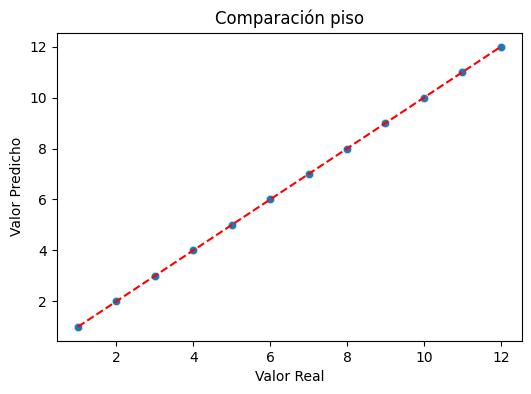

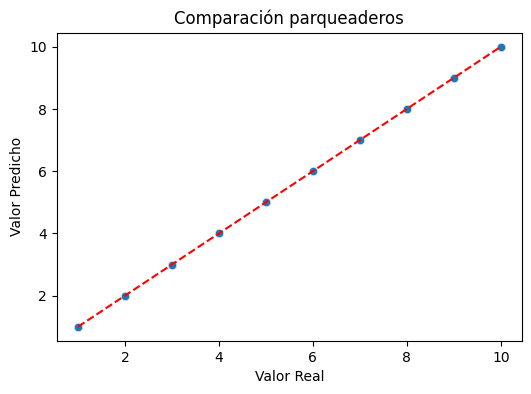

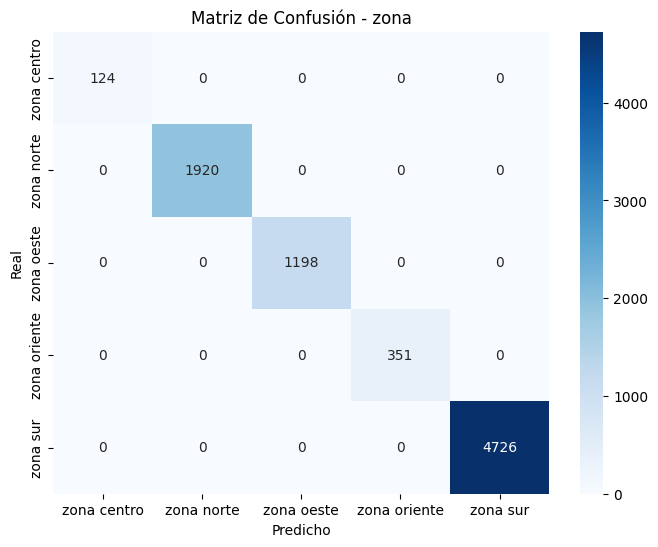

              MAE  RMSE   R²  Accuracy
piso          0.0   0.0  1.0       NaN
parqueaderos  0.0   0.0  1.0       NaN
zona          NaN   NaN  NaN       1.0


In [22]:
# Suponiendo que tienes df_original (antes de imputación) y df_cleaned (después de imputación)
def evaluar_imputacion(df, df_cleaned, columnas_numericas, columnas_categoricas):
    resultados = {}
    
    ## 📌 Evaluación de variables numéricas
    for col in columnas_numericas:
        valores_reales = df[col].dropna()
        valores_predichos = df_cleaned.loc[valores_reales.index, col]

        mae = mean_absolute_error(valores_reales, valores_predichos)
        rmse = np.sqrt(mean_squared_error(valores_reales, valores_predichos))
        r2 = r2_score(valores_reales, valores_predichos)

        resultados[col] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}

        # 📊 Gráfico de dispersión
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=valores_reales, y=valores_predichos, alpha=0.7)
        plt.plot([valores_reales.min(), valores_reales.max()], 
                 [valores_reales.min(), valores_reales.max()], color='red', linestyle='dashed')
        plt.xlabel('Valor Real')
        plt.ylabel('Valor Predicho')
        plt.title(f'Comparación {col}')
        plt.show()

    ## 📌 Evaluación de variables categóricas
    for col in columnas_categoricas:
        valores_reales = df[col].dropna()
        valores_predichos = df_cleaned.loc[valores_reales.index, col]

        acc = accuracy_score(valores_reales, valores_predichos)
        matriz_conf = confusion_matrix(valores_reales, valores_predichos)

        resultados[col] = {'Accuracy': acc}

        # 📊 Matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_conf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(valores_reales), yticklabels=np.unique(valores_reales))
        plt.xlabel('Predicho')
        plt.ylabel('Real')
        plt.title(f'Matriz de Confusión - {col}')
        plt.show()

    return pd.DataFrame(resultados).T

# Definir las columnas a evaluar (ajusta esto según tu dataset)
columnas_numericas = ['piso', 'parqueaderos']  # Agrega más si es necesario
columnas_categoricas = ['zona']  # Agrega más si es necesario

# Ejecutar la evaluación
df_resultados = evaluar_imputacion(df, df_cleaned, columnas_numericas, columnas_categoricas)
print(df_resultados)


In [23]:
df_cleaned.to_csv("datos_limpios.csv", index=False)
